## Training SVM classifier on DD_bigram dataset

The first step is to read dataset from CSV file

In [1]:
import pandas as pd
from sklearn import preprocessing


#dd_dataset = pd.read_csv('./dataset/dd_pssm_dataset_improved.csv')
# Add separated dimers feature extraction

dd_dataset = pd.read_csv('./dataset/ACC_dataset.csv')

In [2]:
dd_dataset.head()

,Fold,Protein name,F1,F2,F3,F4,F5,F6,F7,F8,...,F1591,F1592,F1593,F1594,F1595,F1596,F1597,F1598,F1599,F1600
0,Globm-like(alpha),2LHB,0.793873,-3.081755e-02,0.064096,-0.278083,0.512932,-0.041347,0.165949,1.575439,...,0.472132,0.170672,-0.218105,-0.170188,0.349094,-0.134711,0.038802,-0.288539,-0.154789,-0.047447
1,Globm-like(alpha),3SDHA,0.875325,-9.067278e-03,-0.157973,-0.037824,-0.096289,-0.600570,-0.038737,-0.059022,...,0.560130,0.158264,0.321806,-0.061033,-0.141472,-0.118656,-0.194835,-0.168613,-0.201502,0.559921
2,Globm-like(alpha),1FLP,0.125819,-1.781493e-03,0.145366,-0.101477,0.071309,-0.206604,-0.007126,-0.007126,...,-0.014928,-0.010667,-0.012827,-0.005574,-0.009291,-0.003234,-0.019719,-0.010969,-0.013007,-0.007433
3,Globm-like(alpha),2HBG,0.494363,-2.093698e-03,-0.143159,-0.102345,-0.048332,-0.504646,0.173782,-0.166912,...,0.231198,-0.039521,-0.023178,-0.023070,-0.051187,-0.023942,0.219130,-0.019667,-0.086914,-0.015961
4,Globm-like(alpha),2MGE,-0.872793,9.482830e-29,-0.247875,-0.822224,-0.300076,-0.207240,-0.050007,0.256775,...,-0.103157,-0.021785,0.091978,-0.050952,-0.077002,-0.056616,0.062953,-0.069314,0.162716,0.218462


Convert class lables to unique integers

In [3]:
# Encode class labels
#from sklearn.preprocessing import LabelEncoder

y_true, labels = pd.factorize(dd_dataset.Fold)
dd_dataset.insert(1, 'class labels', y_true)

In [4]:
dd_dataset.head()

,Fold,class labels,Protein name,F1,F2,F3,F4,F5,F6,F7,...,F1591,F1592,F1593,F1594,F1595,F1596,F1597,F1598,F1599,F1600
0,Globm-like(alpha),0,2LHB,0.793873,-3.081755e-02,0.064096,-0.278083,0.512932,-0.041347,0.165949,...,0.472132,0.170672,-0.218105,-0.170188,0.349094,-0.134711,0.038802,-0.288539,-0.154789,-0.047447
1,Globm-like(alpha),0,3SDHA,0.875325,-9.067278e-03,-0.157973,-0.037824,-0.096289,-0.600570,-0.038737,...,0.560130,0.158264,0.321806,-0.061033,-0.141472,-0.118656,-0.194835,-0.168613,-0.201502,0.559921
2,Globm-like(alpha),0,1FLP,0.125819,-1.781493e-03,0.145366,-0.101477,0.071309,-0.206604,-0.007126,...,-0.014928,-0.010667,-0.012827,-0.005574,-0.009291,-0.003234,-0.019719,-0.010969,-0.013007,-0.007433
3,Globm-like(alpha),0,2HBG,0.494363,-2.093698e-03,-0.143159,-0.102345,-0.048332,-0.504646,0.173782,...,0.231198,-0.039521,-0.023178,-0.023070,-0.051187,-0.023942,0.219130,-0.019667,-0.086914,-0.015961
4,Globm-like(alpha),0,2MGE,-0.872793,9.482830e-29,-0.247875,-0.822224,-0.300076,-0.207240,-0.050007,...,-0.103157,-0.021785,0.091978,-0.050952,-0.077002,-0.056616,0.062953,-0.069314,0.162716,0.218462


Create a training set from pandas data frame

In [5]:
train_data = dd_dataset[['F%d' % i for i in range(1,1601)]].values

# Normalize dataset
min_max_scaler = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(train_data)
train_data = train_scaled

print("Number of samples: %d, Number of features: %d" % (train_data.shape[0], train_data.shape[1]))

Number of samples: 311, Number of features: 1600


In [6]:
# Show normlaized data

train = pd.DataFrame(train_data)

train.head()


,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.536139,0.793945,0.348690,0.319306,0.779587,0.394475,0.377071,0.839231,0.512293,0.408568,...,0.321682,0.325383,0.213765,0.368394,0.734201,0.207936,0.561797,0.383042,0.214464,0.174972
1,0.552565,0.800719,0.290521,0.349288,0.448809,0.281858,0.298069,0.387477,0.678321,0.203758,...,0.343062,0.318578,0.397547,0.399211,0.602395,0.212538,0.500620,0.418767,0.199575,0.479759
2,0.401415,0.802988,0.369978,0.341344,0.539807,0.361195,0.310270,0.401820,0.411936,0.359765,...,0.203348,0.225930,0.283640,0.414868,0.637910,0.245624,0.546473,0.465729,0.259654,0.195051
3,0.475738,0.802891,0.294402,0.341236,0.474847,0.301175,0.380094,0.357657,0.446061,0.405489,...,0.263146,0.210105,0.280117,0.409929,0.626653,0.239688,0.609015,0.463138,0.236098,0.190772
4,0.200029,0.803543,0.266973,0.251402,0.338163,0.361067,0.293719,0.474761,0.555613,0.100691,...,0.181913,0.219832,0.319315,0.402057,0.619717,0.230322,0.568121,0.448348,0.315661,0.308409


## Data analysis

In [7]:
# Frequency of folds
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
freq_plot = dd_dataset['Fold'].value_counts().plot(ax=ax, kind='bar')
freq_plot.set_ylabel('Number of proteins')
plt.show()

<Figure size 640x480 with 1 Axes>

## SVM classifier

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Hyperparameters
kernel = 'rbf'

# An instance of SVM classifier
svm_cl = SVC(kernel=kernel)

Define range of parameters for Grid Search

In [9]:
# Penalty parameter
c_range = {'C': [float(2**i) for i in range(-14, 14)]}
# Gamma parameter for RBF kernel
gamma_range = {'gamma': [float(2**i) for i in range(-14, 14)]} if kernel == 'rbf' else {}

param_range = {**c_range, **gamma_range}

# Arguments for grid search
cv_fold = 10
n_workers = -1 # Number of CPU threads

result = GridSearchCV(svm_cl, param_range, cv=cv_fold, n_jobs=n_workers, refit=True,
                      verbose=1)

Start grid search!

In [10]:
result.fit(train_data, y_true)

Fitting 10 folds for each of 784 candidates, totalling 7840 fits


C:\Users\Mir\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 7192 t

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0], 'gamma': [6.103515625e-05, 0.0...25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Best results

In [11]:
print("Best accuracy: %.2f" % (result.best_score_ * 100))

Best accuracy: 21.86


Confusion matrix

Accuracy:  89.06752411575563


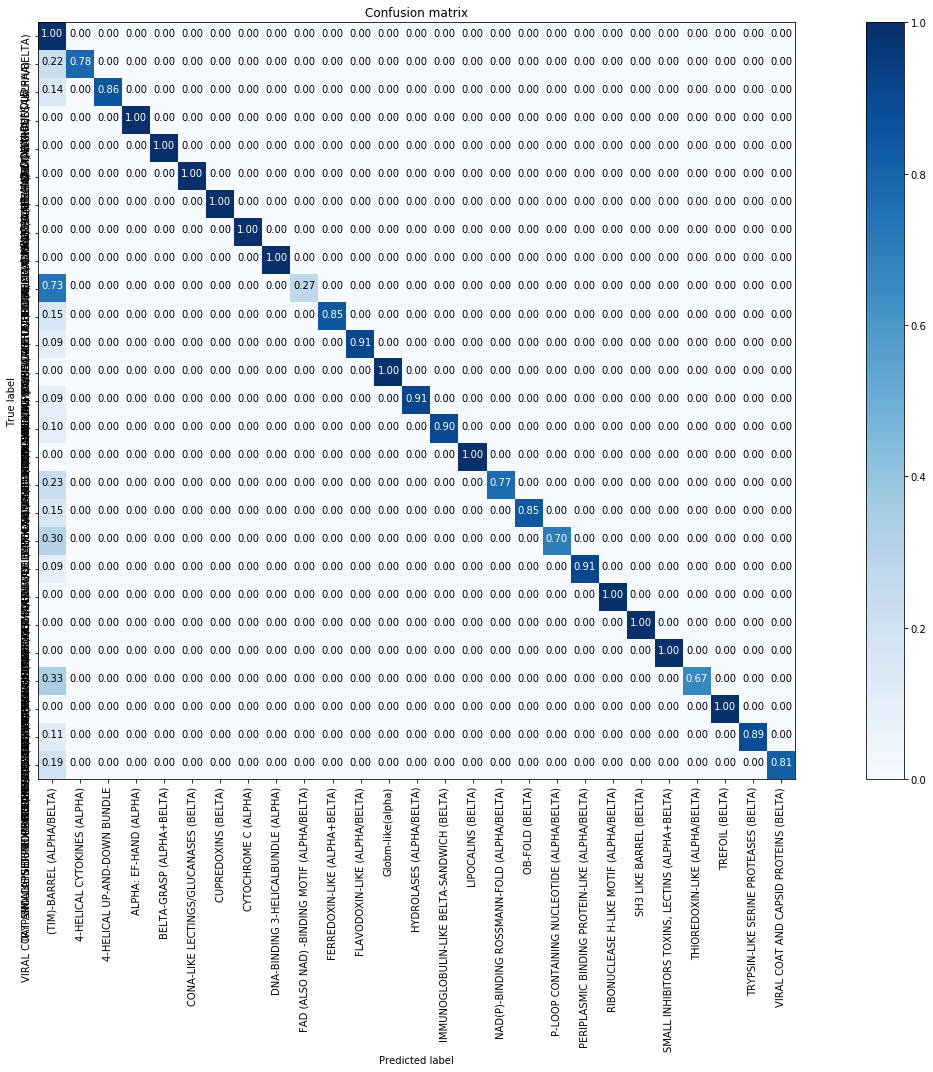

In [12]:
from misc import plt_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

y_pred = result.best_estimator_.predict(train_data)

cm = confusion_matrix(labels[y_true], labels[y_pred])

print("Accuracy: ", (accuracy_score(labels[y_true], labels[y_pred]) * 100))

plt.figure(figsize=(20, 15))
plt_confusion_matrix(cm, np.unique(labels[y_true]))
plt.savefig("./report/DD_confusion_matrix.png", dpi=256)

Classification report

In [13]:
print(classification_report(labels[y_true], labels[y_pred]))

                                                precision    recall  f1-score   support

                    (TIM)-BARREL (ALPHA/BELTA)       0.46      1.00      0.63        29
                   4-HELICAL CYTOKINES (ALPHA)       1.00      0.78      0.88         9
                  4-HELICAL UP-AND-DOWN BUNDLE       1.00      0.86      0.92         7
                        ALPHA: EF-HAND (ALPHA)       1.00      1.00      1.00         6
                     BELTA-GRASP (ALPHA+BELTA)       1.00      1.00      1.00         7
         CONA-LIKE LECTINGS/GLUCANASES (BELTA)       1.00      1.00      1.00         7
                           CUPREDOXINS (BELTA)       1.00      1.00      1.00         9
                          CYTOCHROME C (ALPHA)       1.00      1.00      1.00         7
           DNA-BINDING 3-HELICALBUNDLE (ALPHA)       1.00      1.00      1.00        12
   FAD (ALSO NAD) -BINDING MOTIF (ALPHA/BELTA)       1.00      0.27      0.43        11
                 FERREDOXIN-LIK

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create Dmatrix for more performance 
data_matrix = xgb.DMatrix(data=train_data,label=labels)

# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2, random_state=123)

In [ ]:
# Instantitate an XGBosst Classifier
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.1, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 10)


In [ ]:
# Fit the classifier to the training set
xg_clf.fit(X_train,y_train)

# Predit test data
preds = xg_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, preds)

In [ ]:
print("Best accuracy: %.2f" % (accuracy*100))
